<a href="https://colab.research.google.com/github/amilafr/algo-python-pro2/blob/main/M6L5_Dynamic_website_Sessions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dynamic website. Sessions

[PPT M6L5 ENG](https://docs.google.com/presentation/d/1eQWXtHMxTMBgo_qMfymKAB0WujT79z7K5MwZa2Xljhc/edit?usp=sharing)

# Designing a web application

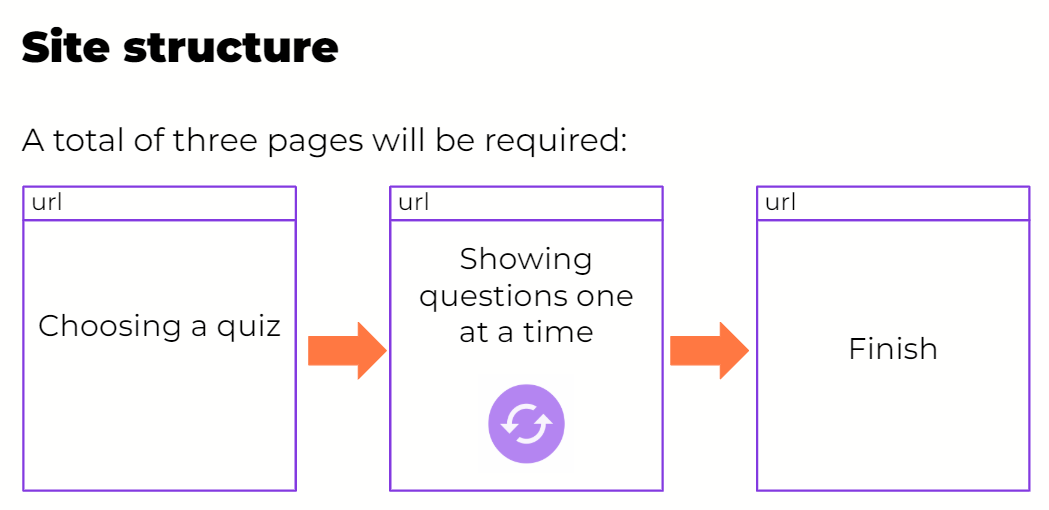

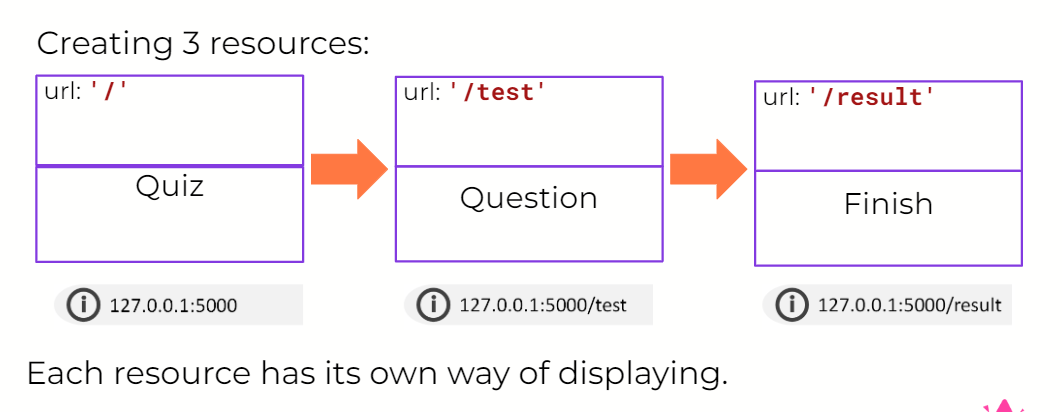

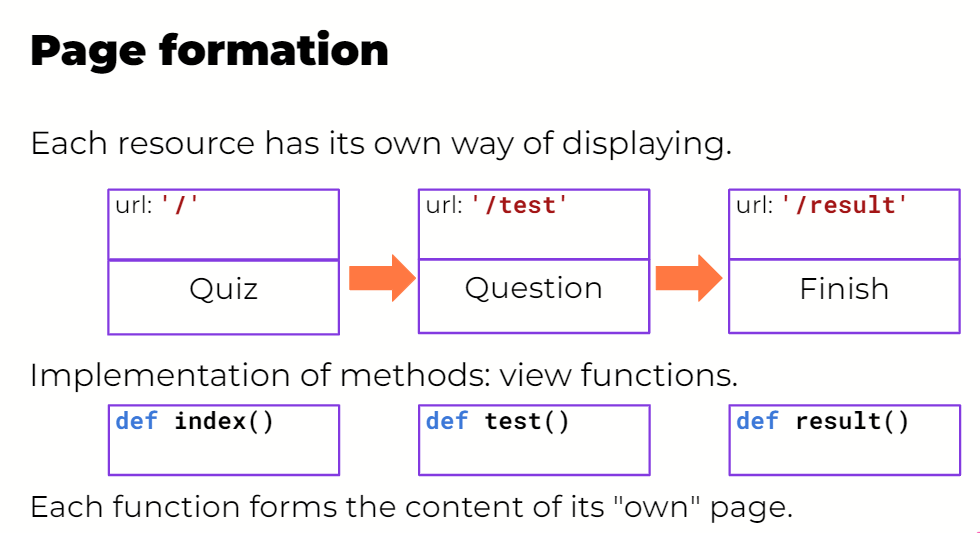

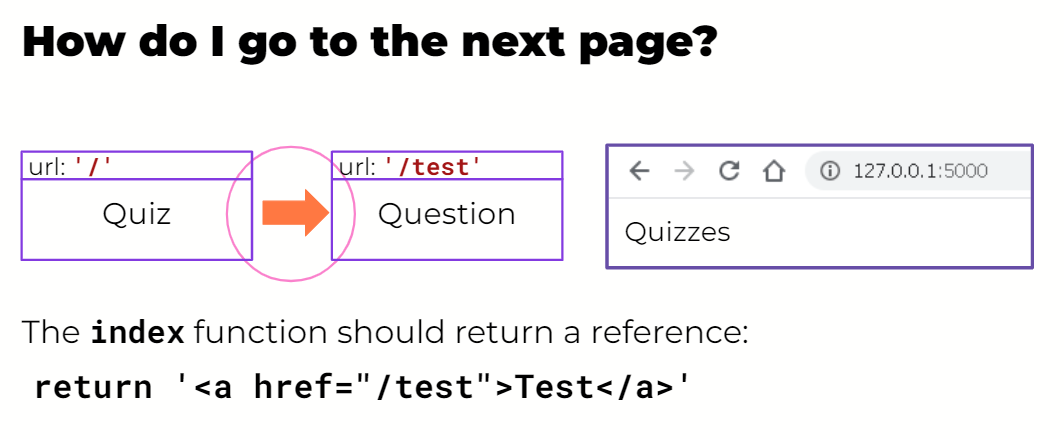



```
return '<a href="/test">Test</a>'
```



# Flask commands


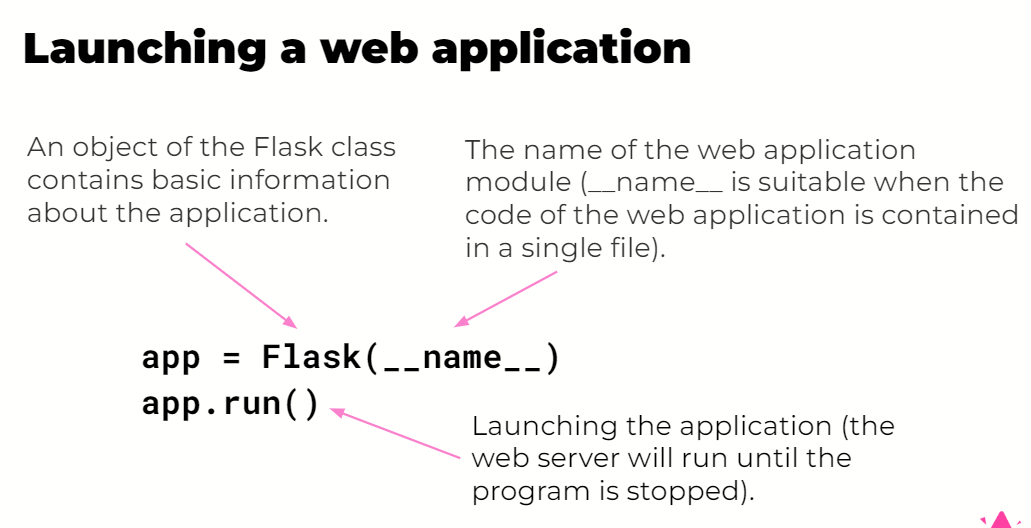

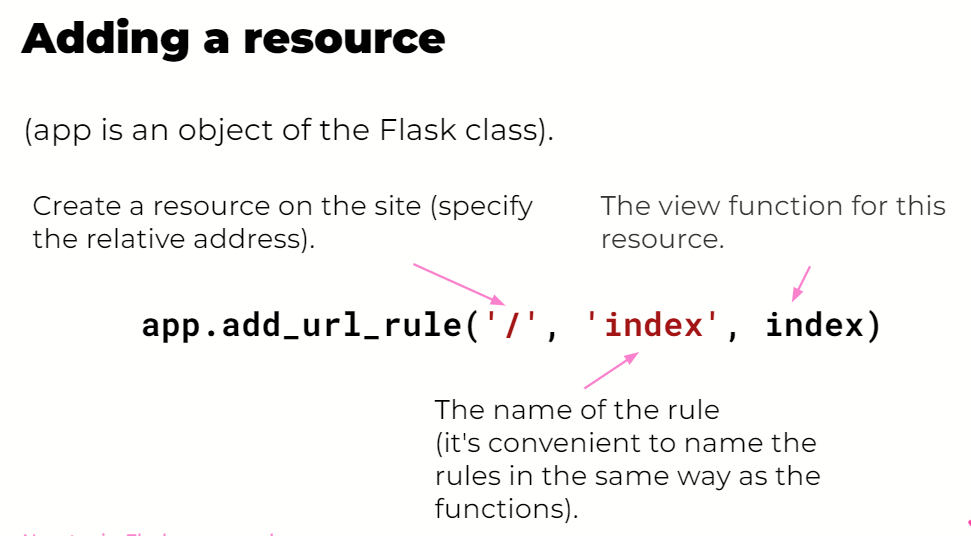

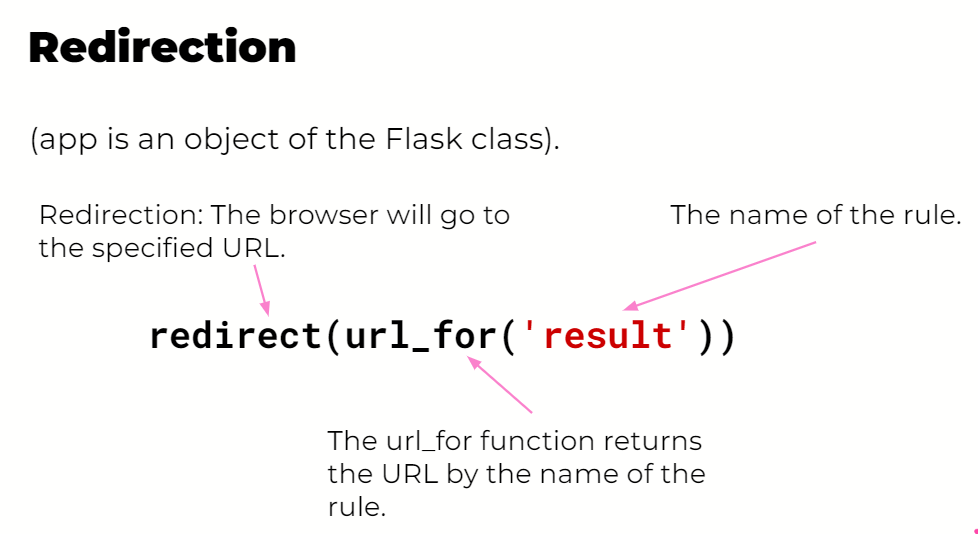

# Sessions.

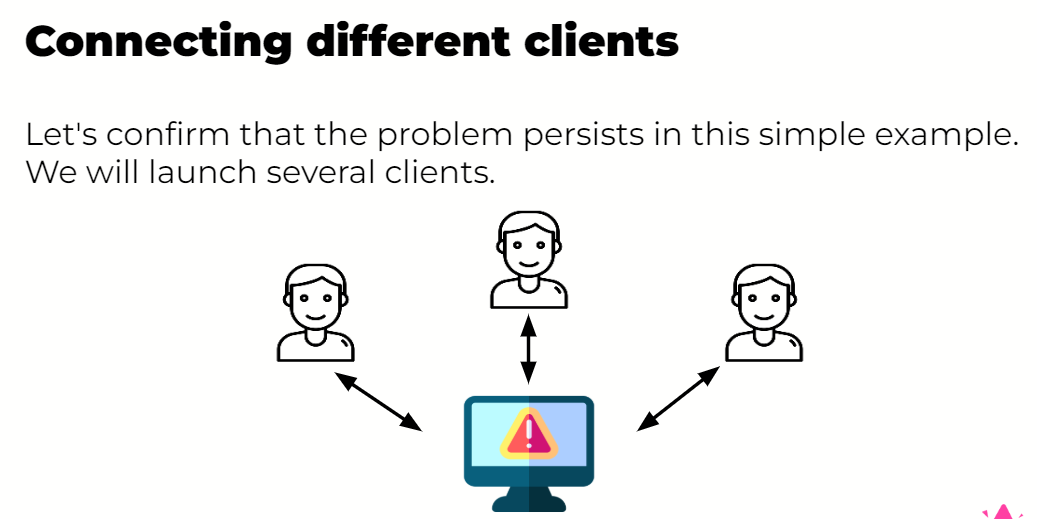

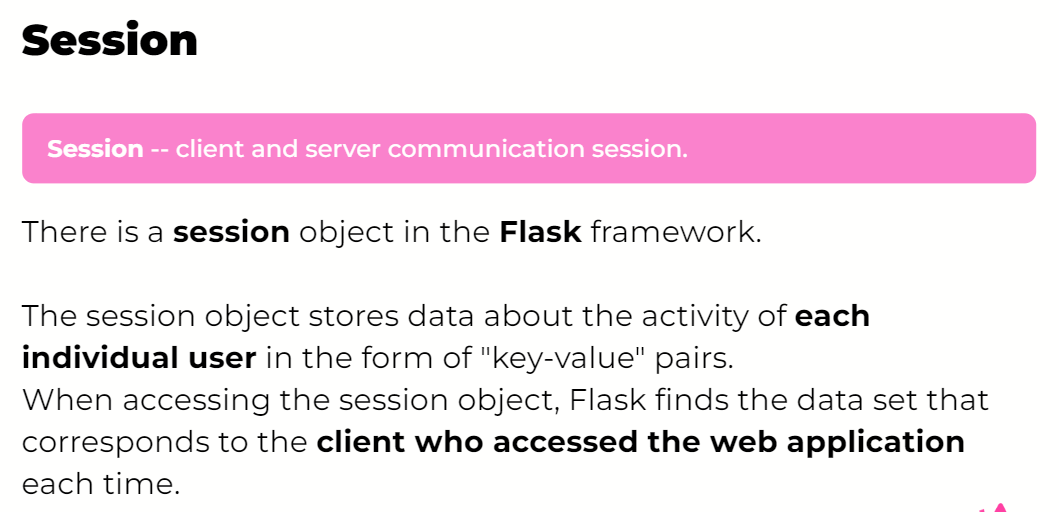

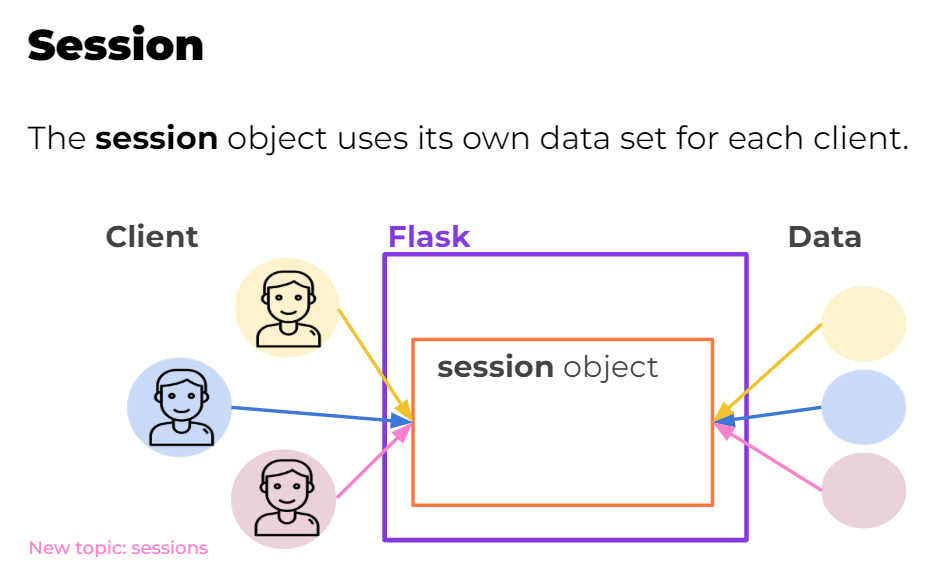

In [ ]:
# Importing the session object into the program:
from flask import session

# Instead of a variable, create a key-value pair:
session['counter'] = 0

# When accessing the page, we will increase the value of
# for the counter key:
session['counter'] += 1


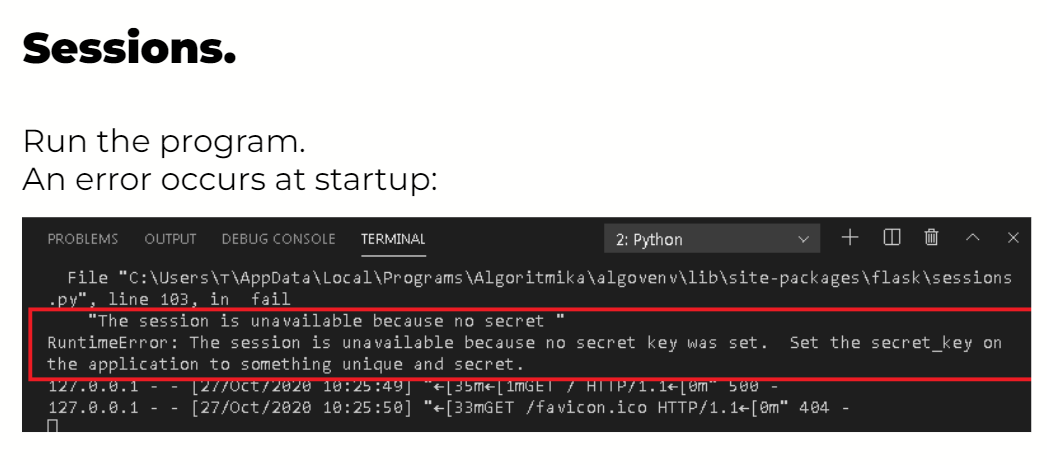

In [ ]:
# Creating a web application object:
app = Flask(__name__)
# app.config stores settings that are common to all users. Creating a secret key:
app.config['SECRET_KEY'] = 'VeryStrongKey'


# Cookie

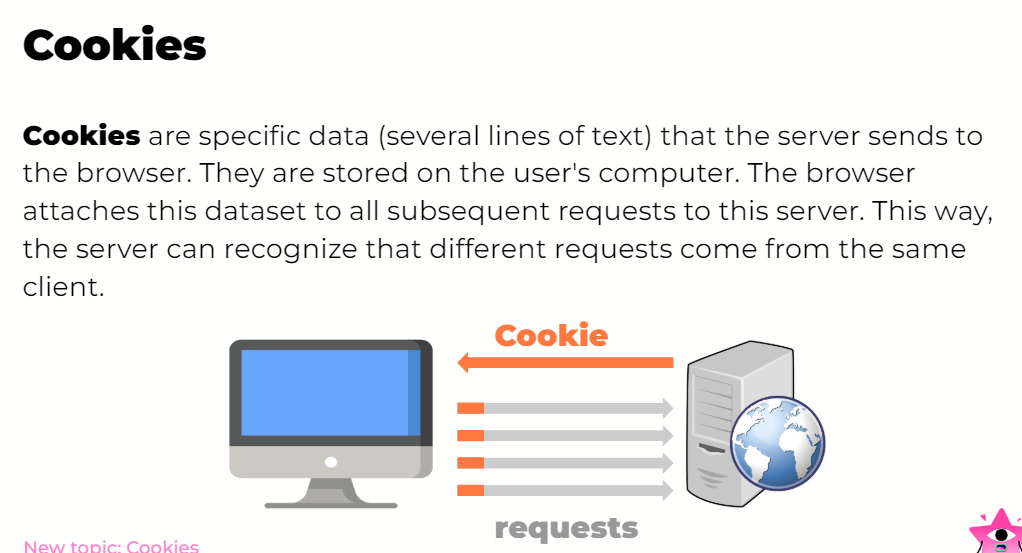

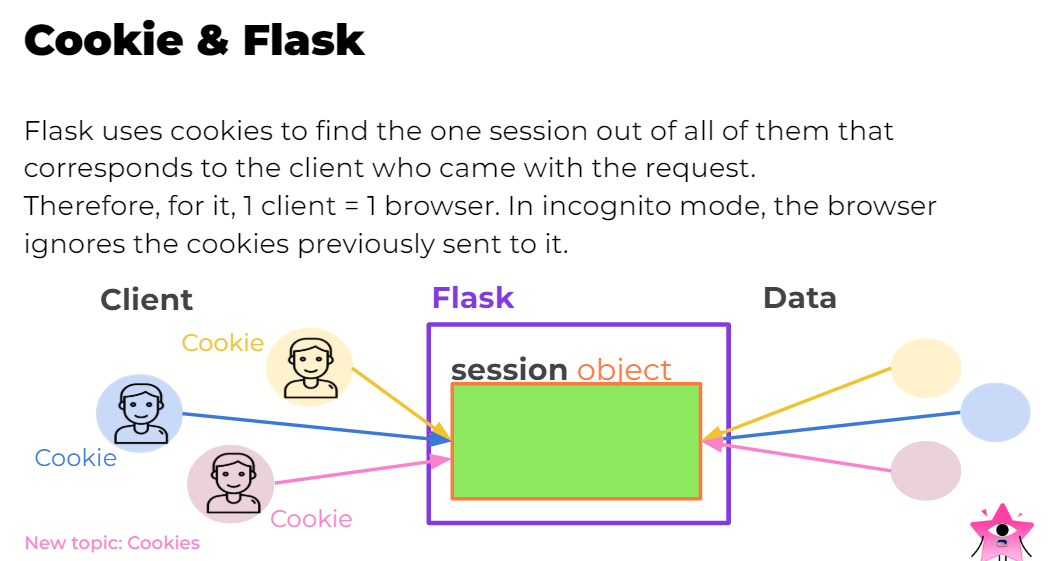

# Example Codes

## VSC. URL rules ----- quiz_no_session.py

In [ ]:
from random import randint
from flask import Flask, session, redirect, url_for
from db_scripts import get_question_after
quiz = 0
last_question = 0
def index():
   global quiz, last_question
   max_quiz = 3
   # or if the student wrote get_quiz_count(), then you can import it and specify:
   # max_quiz = get_quiz_count[0]
   quiz = randint(1, max_quiz)
   # or if the student wrote get_quiz_count(), then you can import it and specify:
   # session['quiz'] = get_random_quiz_id()
   last_question = 0
   return '<a href="/test">Test</a>'
def test():
   global last_question
   result = get_question_after(last_question, quiz)
   if result is None or len(result) == 0:
           return redirect(url_for('result'))

   else:
       last_question = result[0]
       # if we've taught the database to return Row or dict, then we shouldn't write result[0] and instead write result['id']
       return '<h1>' + str(quiz) + '<br>' + str(result) + '</h1>'
def result():
   return "that's all folks!"
# Creating a web application object:
app = Flask(__name__)
app.add_url_rule('/', 'index', index) # creates a rule for the URL '/'
app.add_url_rule('/test', 'test', test) # creates a rule for the URL '/test'
app.add_url_rule('/result', 'result', result) # creates a rule for the URL '/test'
if __name__ == '__main__':
   # Starting the web server:
   app.run()


## VSC. Sessions. ----- quiz.py

In [ ]:
from random import randint
from flask import Flask, session, redirect, url_for
from db_scripts import get_question_after
def index():
   max_quiz = 3
   # or if the student wrote get_quiz_count(), then you can import it and specify:
   # max_quiz = get_quiz_count[0]
   session['quiz'] = randint(1, max_quiz)
   # or if the student wrote get_quiz_count(), then you can import it and specify:
   # session['quiz'] = get_random_quiz_id()
   session['last_question'] = 0
   return '<a href="/test">Test</a>'
​
def test():
   result = get_question_after(session['last_question'], session['quiz'])
   if result is None or len(result) == 0:
       return redirect(url_for('result'))
   else:
       session['last_question'] = result[0]
       # if we've taught the database to return Row or dict, then we shouldn't write result[0] and instead write result['id']
       return '<h1>' + str(session['quiz']) + '<br>' + str(result) + '</h1>'
​
def result():
   return "that's all folks!"
​
# Creating a web application object:
app = Flask(__name__)
app.add_url_rule('/', 'index', index) # creates a rule for the URL '/'
app.add_url_rule('/test', 'test', test) # creates a rule for the URL '/test'
app.add_url_rule('/result', 'result', result) # creates a rule for the URL '/test'
# Setting the encryption key:
app.config['SECRET_KEY'] = 'ThisIsSecretSecretSecretLife'
​
if __name__ == '__main__':
   # Starting the web server:
   app.run()


## Bonus task. Counter

In [ ]:
from flask import Flask, session
def index():
   """ When visiting the site, we reset the counter and provide a link to the page with the counter change """
   session['counter'] = 0
   return '<a href="/counter">Next</a>'

def counter():
   """ Increasing the counter and giving a link to the page with the counter change """
   session['counter'] += 1
   return '<h1>' + str(session['counter']) + '</h1>'
# Creating a web application object:
app = Flask(__name__)
app.config['SECRET_KEY'] = 'VeryStrongKey'
app.add_url_rule('/', 'index', index) # creates a rule for the URL '/':
                       # run the index function and return its value.
app.add_url_rule('/counter', 'counter', counter) # creates a rule for the URL 'counter/'

if __name__ == '__main__':
   # Starting the web server:
   app.run()
